In [2]:
import torch

In [3]:
print("hello")

hello


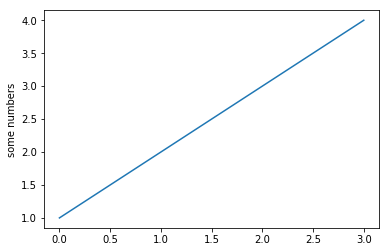

In [5]:
import matplotlib.pyplot as plt
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

In [6]:
from __future__ import print_function
import torch

In [11]:
x = torch.empty(5, 3)
print(x)

tensor([[ 0.0000e+00, -0.0000e+00, -5.0278e-03],
        [-4.6577e-10,  5.6052e-45,  1.5554e-43],
        [ 1.5975e-43,  1.3873e-43,  1.4574e-43],
        [ 6.4460e-44,  1.4153e-43,  1.4013e-45],
        [ 1.9426e-29,  1.4013e-45,  1.9435e-29]])


In [12]:
x = torch.rand(5, 3)
print(x)

tensor([[0.3171, 0.9254, 0.7341],
        [0.8652, 0.7336, 0.4622],
        [0.7784, 0.0482, 0.1794],
        [0.5730, 0.0916, 0.4193],
        [0.5867, 0.7600, 0.0470]])


In [18]:
x = torch.zeros(5, 3, dtype=torch.long)
print(x)

tensor([[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]])


In [21]:
x = torch.tensor([5.5 ,3])


tensor([5.5000, 3.0000])


In [19]:
x = x.new_ones(5, 3, dtype=torch.double)
print(x)

x = torch.rand_like(x, dtype=torch.float)
print(x)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)
tensor([[0.1084, 0.6639, 0.2422],
        [0.9720, 0.7601, 0.3282],
        [0.6250, 0.2179, 0.7406],
        [0.2688, 0.7679, 0.8562],
        [0.9640, 0.7465, 0.2508]])


In [11]:
print(x.size())

torch.Size([5, 3])


In [12]:
y = torch.rand(5, 3)
print(x + y)

tensor([[0.6949, 0.6120, 1.1526],
        [0.4443, 0.3487, 0.7688],
        [1.7182, 0.1563, 1.1055],
        [0.5396, 1.1489, 1.2697],
        [0.6740, 0.8767, 0.4913]])


In [18]:
result = torch.empty(5, 3)
torch.add(x, y, out=result)
print(result)
print(x)
print(x[:, 1])

tensor([[0.6572, 0.1873, 0.5691],
        [0.3665, 0.1696, 0.2308],
        [0.8498, 0.0430, 0.5344],
        [0.3385, 0.6452, 0.7092],
        [0.0864, 0.1969, 0.1712]])
tensor([0.1873, 0.1696, 0.0430, 0.6452, 0.1969])


In [17]:
print(x[0, :])

tensor([0.6572, 0.1873, 0.5691])


In [19]:
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


In [20]:
x = torch.randn(1)
print(x)
print(x.item())

tensor([0.2002])
0.20021414756774902


In [21]:
a = torch.ones(5)
print(a)

tensor([1., 1., 1., 1., 1.])


In [22]:
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
np.add(a, 1, out=a)
print(a)
print(b)


[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


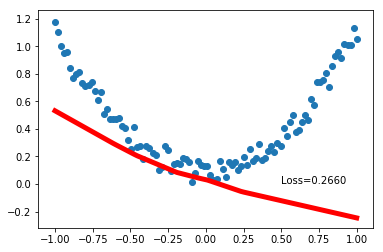

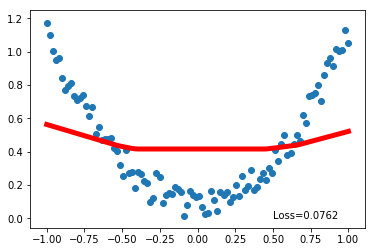

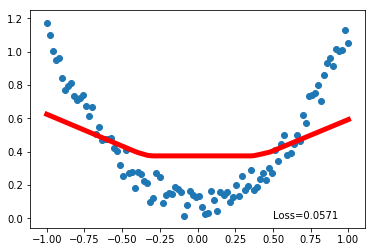

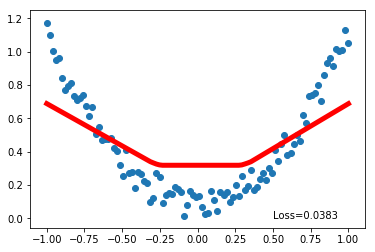

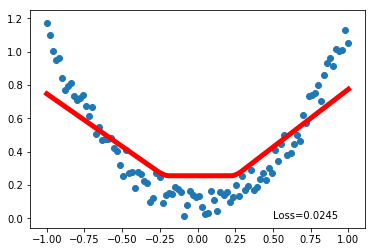

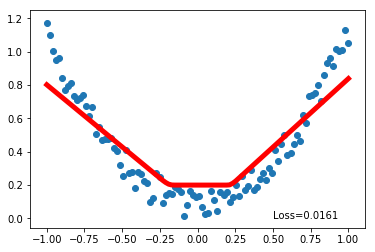

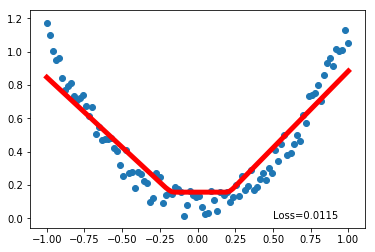

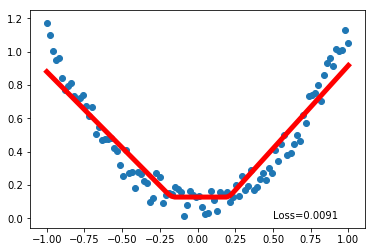

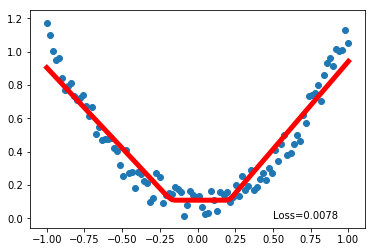

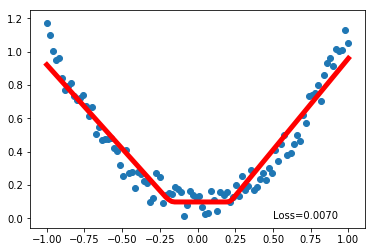

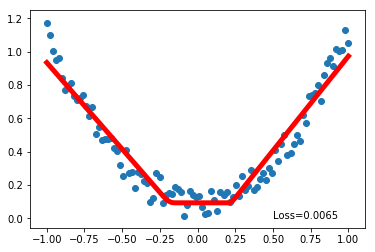

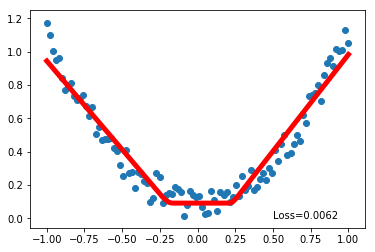

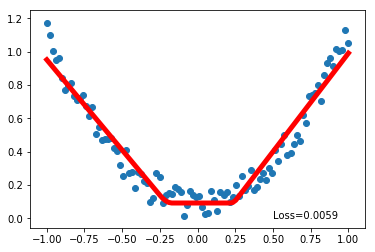

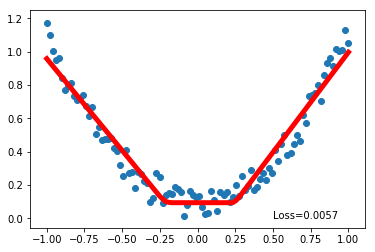

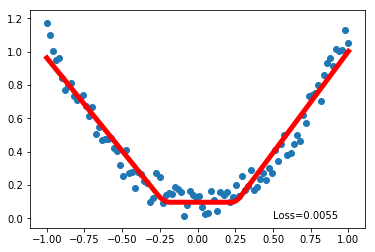

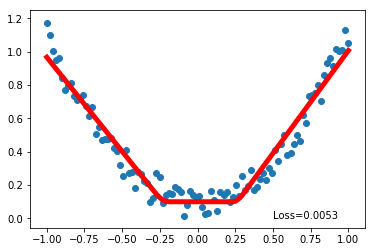

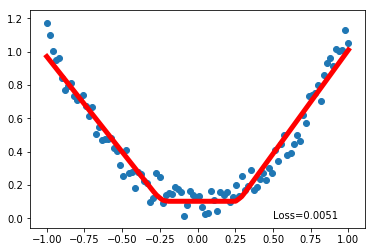

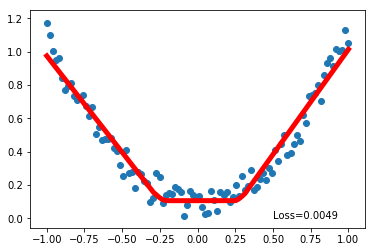

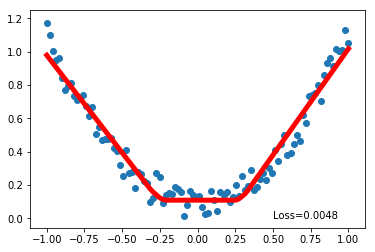

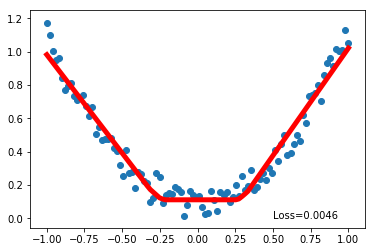

In [2]:
# %%
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

# %%
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)
y = x.pow(2) + 0.2 * torch.rand(x.size())

x, y = Variable(x), Variable(y)

# plt.scatter(x.data.numpy(), y.data.numpy())
# plt.show()

# %%
class Net(torch.nn.Module):

    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)

    def forward(self, x):
        x = F.relu(self.hidden(x))
        x = self.predict(x)
        return x


#%%
net = Net(1, 10, 1)
print(net)
plt.ion()
plt.show()

#%%
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss()

#%%
for t in range(100):
    predicition = net(x)
    loss = loss_func(predicition, y)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if t % 5 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), predicition.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy())
        plt.pause(0.1)
plt.ioff()
plt.show()
#%%
